In [67]:
import perceptron as pc
from sklearn import linear_model
import pandas as pd
import matplotlib.pyplot as plt
import perceptron as pc
import numpy as np
#Part one




In [77]:
#Part 2: Rodent data

# reading csv as pandas framework
rodents = pd.read_csv('rodents.csv', sep=';')
# changing rat and mouse to 1 and -1 
rodents['type'] = rodents['type'].apply(lambda x: 1 if str(x).strip() == 'rat' else -1)
# Removing nan-values
rodents = rodents.dropna()
rodents[:10]



,weight,height,type
0,233.479920,23.514130,1
1,231.324467,26.033830,1
2,17.906954,6.846577,-1
3,230.276523,24.077800,1
4,20.360593,6.605983,-1
5,21.605388,6.812460,-1
6,17.857287,11.035404,1
7,22.126466,3.426412,-1
8,16.705946,10.224681,1
10,17.829896,1.760933,-1


In [131]:
# converts to numpy array
rodents_np = np.asarray(rodents)
# looping trough all data in rodents_np...
# in format: [weight and height, type]
rodents_fmt = [(data[:2], data[2]) for data in rodents_np]
w,_ = pc.pla(rodents_fmt)
w

array([ 143.26070173, -154.15530417])

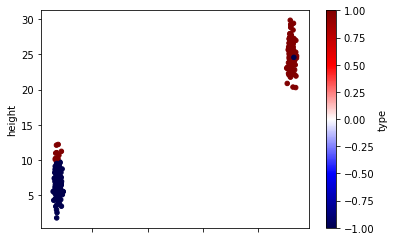

In [114]:
rodents.plot.scatter(x='weight',
                      y='height',
                      c='type',colormap='seismic')

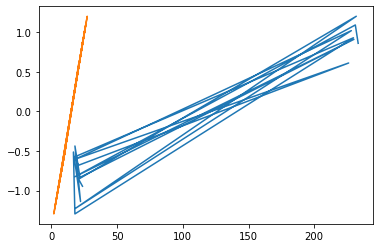

In [120]:
from sklearn import linear_model
# Creating x and y data from rodents_np
X = [data[:2] for data in rodents_np]
y = [data[2] for data in rodents_np]
# Creating testing and training data for x and y
X_train = X[:-20]
X_test = X[:20]

y_train = y[:-20]
y_test = y[:20]
# Creating regression object
reg = linear_model.LinearRegression()
# Training model
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)
coef = reg.coef_
plt.plot(X_test, y_pred)

In [135]:
def predict(inp_vec, weights):
    class_label_prediction = pc.perceptron(inp_vec, weights)
    return class_label_prediction


weights =  [40, -190]
test_data = [[231.32446731816555,26.03382997978225],
[17.906954059999567,6.846576762459397],
[230.276522831171,24.077799766119398]]
for t in test_data:
    if predict(t, weights) == 1:
        print('rat')
    else:
        print('mouse')


rat
mouse
rat
